In [1]:
from skimpy import skim #data summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import charset_normalizer
import seaborn as sns
import plotly.express as px #interactive visualization
import charset_normalizer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open("visualizing_global_co2_data_cleaned.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [3]:
data = pd.read_csv('visualizing_global_co2_data_cleaned.csv', encoding = 'ascii')
df = pd.DataFrame(data)

## Data Schema

In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 23494  │ │ float64     │ 52    │                                                          │
│ │ Number of columns │ 55     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃       ┃          ┃           ┃        ┃         ┃         ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA %  ┃ mean     ┃ sd        ┃ p0     ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year     │    0 │     0 │     1962 │     42.91 │   1850 │    1935 │    1970 │     1997 │     2021 │ ▂▂▃▅▇▇ │  │
│ │ populati │  926 │  3.94 │ 92860000 │ 418500000 │   1480 │ 1415000 │ 5340000 │ 21760000 │ 79090000 │   ▇    │  │
│ │ on       │      │       │          │           │        │         │         │          │       00 │        │  │
│ │ cement_c │ 3502 │ 14.91 │    10.48 │     70.27 │      0 │       0 │   0.116 │    1.287 │     1673 │   ▇    │  │
│ │ o2       │      │       │          │           │        │         │         │          │          │        │  │
│ │ cement_c │ 3574 │ 15.21 │  0.07293 │    0.1289 │      0 │       0 │   0.016 │    0.104 │    2.574 │   ▇    │  │
│ │ o2_per_c │      │       │          │           │        │         │         │          │          │        │  │
│ │ apita    │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2      │    0 │     0 │    348.1 │      1755 │      0 │   0.575 │    5.27 │    50.21 │    37120 │   ▇    │  │
│ │ co2_grow │  269 │  1.14 │     7.04 │     65.47 │  -1818 │  -0.011 │   0.073 │    1.268 │     1860 │    ▇▁  │  │
│ │ th_abs   │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_grow │  307 │  1.31 │    21.44 │     725.4 │   -100 │  -0.893 │   4.088 │    10.93 │   102300 │   ▇    │  │
│ │ th_prct  │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │  953 │  4.06 │      535 │      2153 │   -187 │   6.346 │   28.74 │    129.1 │    41640 │   ▇    │  │
│ │ uding_lu │      │       │          │           │        │         │         │          │          │        │  │
│ │ c        │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │ 1232 │  5.24 │    7.797 │     96.02 │  -2318 │  -0.722 │   0.103 │    2.747 │     2247 │     ▇  │  │
│ │ uding_lu │      │       │          │           │        │         │         │          │          │        │  │
│ │ c_growth │      │       │          │           │        │         │         │          │          │        │  │
│ │ _abs     │      │       │          │           │        │         │         │          │          │        │  │
│ │ co2_incl │ 1166 │  4.96 │    13.01 │     732.1 │ -36

### Search for anomalous data

In [5]:
info = pd.DataFrame({
    "Count":df.shape[0],
    "Null":df.isnull().sum(),
    "Null %":df.isnull().mean() * 100,
    "Zeros":(df == 0).sum(),
    "Zeros %":(df == 0).mean() * 100,
    "Unique":df.nunique(),
    "Duplicated":(df.duplicated() == True).sum(),
  
})
info
print(df["country"].nunique())

print(df["iso_code"].nunique())
print(df["country"].unique())

237
219
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Asia (excl. China and India)' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'Faroe Islands' '

### Drop zero emissions

In [6]:
co2_zeros = (df["co2"] == 0).sum()
print(co2_zeros)
df = df.drop(df[df["co2"] == 0].index)
co2_zeros = (df["co2"] == 0).sum()
print(co2_zeros)

102
0


### Countries and regions

In [7]:
non_countries = [
    "Africa", "Asia", "Asia (excl. China and India)", "Europe", "Europe (excl. EU-27)",
    "Europe (excl. EU-28)", "European Union (27)", "European Union (28)", 
    "High-income countries", "Low-income countries", "Lower-middle-income countries", 
    "North America", "North America (excl. USA)", "Oceania", "South America",'Upper-middle-income countries', "World"
]

countries = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands',
 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
 'Faroe Islands', 'Fiji', 'Finland', 'France',
 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea',
 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary',
 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
 'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte',
 'Mexico', 'Micronesia (country)', 'Moldova', 'Mongolia', 'Montenegro',
 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
 'Niue', 'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau',
 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania', 'Russia',
 'Rwanda', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia',
 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa',
 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia',
 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea',
 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname',
 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine',
 'United Arab Emirates', 'United Kingdom', 'United States',
 'Uruguay', 'Uzbekistan', 'Vanuatu',
 'Venezuela', 'Vietnam', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']

df_filtered_country = df[df["country"].isin(countries)].copy()

df_filtered_non_country = df[df["country"].isin(non_countries)].copy()

print(df_filtered_country["country"].unique())
print(df_filtered_country["country"].nunique())
print(df_filtered_non_country["country"].nunique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenland' 'Grenada' 'Guadeloupe' 'Guat

### it1

In [8]:
df_it1 = df[["country","year","co2","co2_including_luc"]]


info1 = pd.DataFrame({
    "Count":df_it1.shape[0],
    "Null":df_it1.isnull().sum(),
    "Null %":df_it1.isnull().mean() * 100,
    "Zeros":(df_it1 == 0).sum(),
    "Zeros %":(df_it1 == 0).mean() * 100,
    "Unique":df_it1.nunique(),
    "Duplicated":(df_it1.duplicated() == True).sum(),
    "Under Zeros":(df_it1["co2_including_luc"] < 0).sum() 
})
info1

,Count,Null,Null %,Zeros,Zeros %,Unique,Duplicated,Under Zeros
country,23392,0,0.000000,0,0.0000,237,0,369
year,23392,0,0.000000,0,0.0000,172,0,369
co2,23392,0,0.000000,0,0.0000,14458,0,369
co2_including_luc,23392,953,4.074042,8,0.0342,18675,0,369


### it2

In [9]:
df_it2 = df[[ "year","cement_co2", "coal_co2","flaring_co2", "gas_co2","land_use_change_co2", "oil_co2"]].copy()

info2 = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info2)

                     Count  Null     Null %  Zeros    Zeros %  Unique  \
year                 23392     0   0.000000      0   0.000000     172   
cement_co2           23392  3481  14.881156   7056  30.164159    5261   
coal_co2             23392     0   0.000000   6719  28.723495   10076   
flaring_co2          23392    95   0.406122  18370  78.531122    3266   
gas_co2              23392    27   0.115424  14120  60.362517    6168   
land_use_change_co2  23392   953   4.074042    915   3.911594    7001   
oil_co2              23392     0   0.000000   2335   9.982045   10528   

                     Duplicated  Under Zeros  
year                        112            0  
cement_co2                  112            0  
coal_co2                    112            0  
flaring_co2                 112            0  
gas_co2                     112            0  
land_use_change_co2         112         3470  
oil_co2                     112            0  


### First look at the data

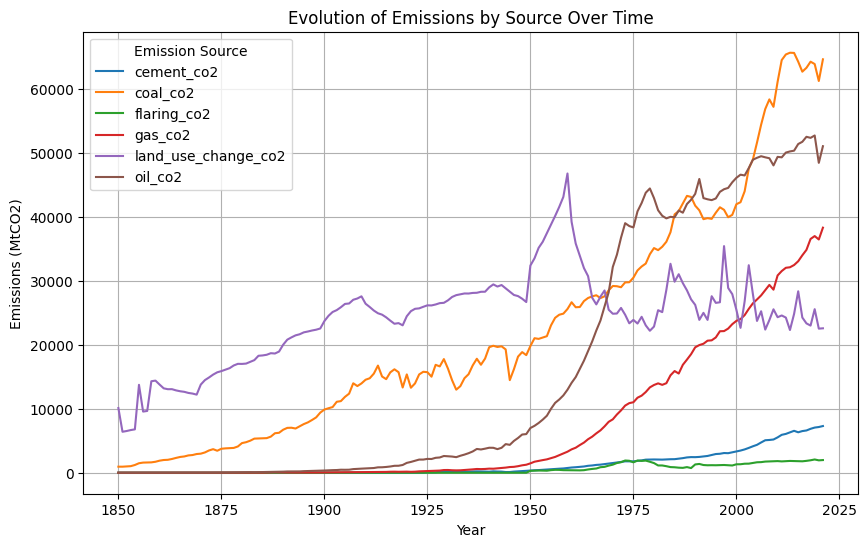

In [10]:
df_it2_grouped = df_it2.groupby("year").sum().reset_index()

plt.figure(figsize=(10, 6))

for column in df_it2_grouped.columns[1:]:
    plt.plot(df_it2_grouped["year"], df_it2_grouped[column], label=column)

plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2)")
plt.title("Evolution of Emissions by Source Over Time")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()

### Null values distribution

            Count  Null  Null %  Zeros  Zeros %  Unique  Duplicated  \
year         3481     0     0.0      0      0.0     131        3350   
cement_co2   3481  3481   100.0      0      0.0       0        3350   

            Under Zeros  
year                  0  
cement_co2            0  


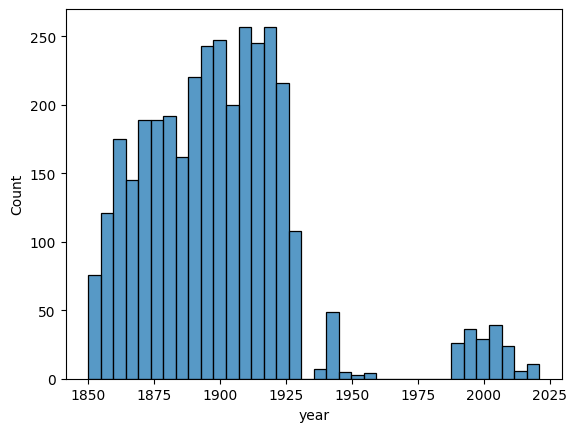

In [11]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]
df_cement_nulls.head()

info_cement = pd.DataFrame({
    "Count": [df_cement_nulls.shape[0]] * len(df_cement_nulls.columns),
    "Null": df_cement_nulls.isnull().sum(),
    "Null %": df_cement_nulls.isnull().mean() * 100,
    "Zeros": (df_cement_nulls == 0).sum(),
    "Zeros %": (df_cement_nulls == 0).mean() * 100,
    "Unique": df_cement_nulls.nunique(),
    "Duplicated": [df_cement_nulls.duplicated().sum()] * len(df_cement_nulls.columns),
    "Under Zeros": (df_cement_nulls < 0).sum()
}, index=df_cement_nulls.columns)

print(info_cement)

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

##### Discard null values over 1930

In [12]:
df = df[~(df['cement_co2'].isnull() & (df['year'] > 1930))]
df

,country,year,iso_code,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1949,AFG,7356890.0,0.000,0.000,0.015,NaN,NaN,8.039,...,0.000,NaN,0.0,0.160,0.000,0.129,0.000,0.000,0.000,0.0
1,Afghanistan,1950,AFG,7480464.0,0.000,0.000,0.084,0.070,475.000,8.585,...,0.000,0.0,0.0,0.157,0.004,0.129,0.000,0.000,0.000,0.0
2,Afghanistan,1951,AFG,7571542.0,0.000,0.000,0.092,0.007,8.696,9.142,...,0.000,0.0,0.0,0.162,0.004,0.129,0.000,0.000,0.001,0.0
3,Afghanistan,1952,AFG,7667534.0,0.000,0.000,0.092,0.000,0.000,9.948,...,0.001,0.0,0.0,0.172,0.003,0.129,0.000,0.000,0.001,0.0
4,Afghanistan,1953,AFG,7764549.0,0.000,0.000,0.106,0.015,16.000,10.915,...,0.001,0.0,0.0,0.185,0.003,0.129,0.000,0.000,0.001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23489,Zimbabwe,2017,ZWE,14751101.0,0.469,0.032,9.596,-0.937,-8.899,19.086,...,0.024,0.0,0.0,0.219,0.026,0.114,0.001,0.001,0.002,0.0
23490,Zimbabwe,2018,ZWE,15052191.0,0.558,0.037,11.795,2.199,22.920,20.626,...,0.025,0.0,0.0,0.211,0.033,0.114,0.001,0.001,0.002,0.0
23491,Zimbabwe,2019,ZWE,15354606.0,0.570,0.037,11.115,-0.681,-5.772,19.432,...,0.025,0.0,0.0,0.183,0.030,0.113,0.001,0.001,0.002,0.0
23492,Zimbabwe,2020,ZWE,15669663.0,0.570,0.036,10.608,-0.507,-4.559,18.485,...,0.025,0.0,0.0,0.194,0.030,0.112,0.001,0.001,0.002,0.0


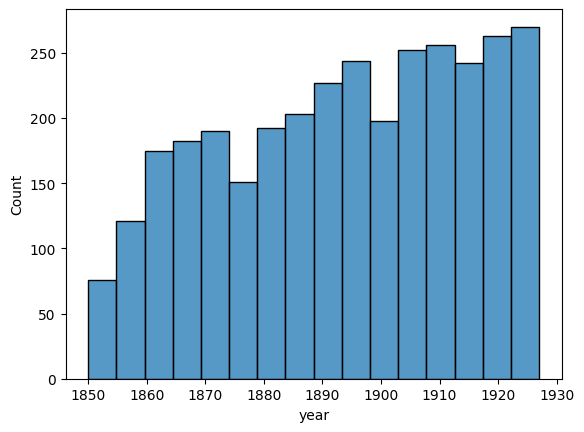

In [13]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

##### Checking coountries with null values

                     Count  Null     Null %  Zeros    Zeros %  Unique  \
year                 23392     0   0.000000      0   0.000000     172   
cement_co2           23392  3481  14.881156   7056  30.164159    5261   
coal_co2             23392     0   0.000000   6719  28.723495   10076   
flaring_co2          23392    95   0.406122  18370  78.531122    3266   
gas_co2              23392    27   0.115424  14120  60.362517    6168   
land_use_change_co2  23392   953   4.074042    915   3.911594    7001   
oil_co2              23392     0   0.000000   2335   9.982045   10528   

                     Duplicated  Under Zeros  
year                        112            0  
cement_co2                  112            0  
coal_co2                    112            0  
flaring_co2                 112            0  
gas_co2                     112            0  
land_use_change_co2         112         3470  
oil_co2                     112            0  
                                 year  

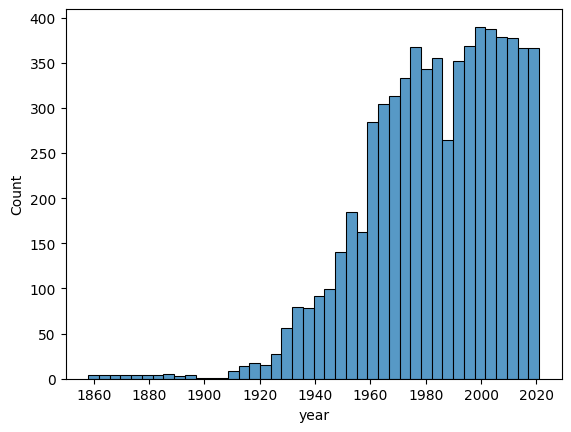

In [14]:
info_oil = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info_oil)

df_coal_zero = df[df["coal_co2"] == 0][["year", "coal_co2","country"]]

df_coal_zero_grouped = df_coal_zero.groupby("country").count()
print(df_coal_zero_grouped.sort_values(by="coal_co2"))

print(df_coal_zero["country"].unique())
sns.histplot(data=df_coal_zero, x="year")
plt.show()

##### Null values and zero values are found in low co2 emissioner countries

### Criteria unification. Null values to zero

In [15]:
columns_to_check = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "land_use_change_co2", "oil_co2"]

df[columns_to_check].fillna(0, inplace=True)

info = pd.DataFrame({
    "Count": [df.shape[0]] * len(columns_to_check),
    "Null": df[columns_to_check].isnull().sum(),
    "Null %": df[columns_to_check].isnull().mean() * 100,
    "Zeros": (df[columns_to_check] == 0).sum(),
    "Zeros %": (df[columns_to_check] == 0).mean() * 100,
    "Unique": df[columns_to_check].nunique(),
    "Duplicated": [df.duplicated().sum()] * len(columns_to_check),
    "Under Zeros": (df[columns_to_check] < 0).sum()
}, index=columns_to_check)

print(info)


                     Count  Null     Null %  Zeros    Zeros %  Unique  \
cement_co2           23153  3242  14.002505   7056  30.475532    5261   
coal_co2             23153     0   0.000000   6569  28.372133   10054   
flaring_co2          23153    95   0.410314  18132  78.313825    3266   
gas_co2              23153    27   0.116616  13891  59.996545    6165   
land_use_change_co2  23153   916   3.956291    915   3.951972    6992   
oil_co2              23153     0   0.000000   2335  10.085086   10498   

                     Duplicated  Under Zeros  
cement_co2                    0            0  
coal_co2                      0            0  
flaring_co2                   0            0  
gas_co2                       0            0  
land_use_change_co2           0         3449  
oil_co2                       0            0  


# Visualization

### Increase in temperature due to greenhouse gases

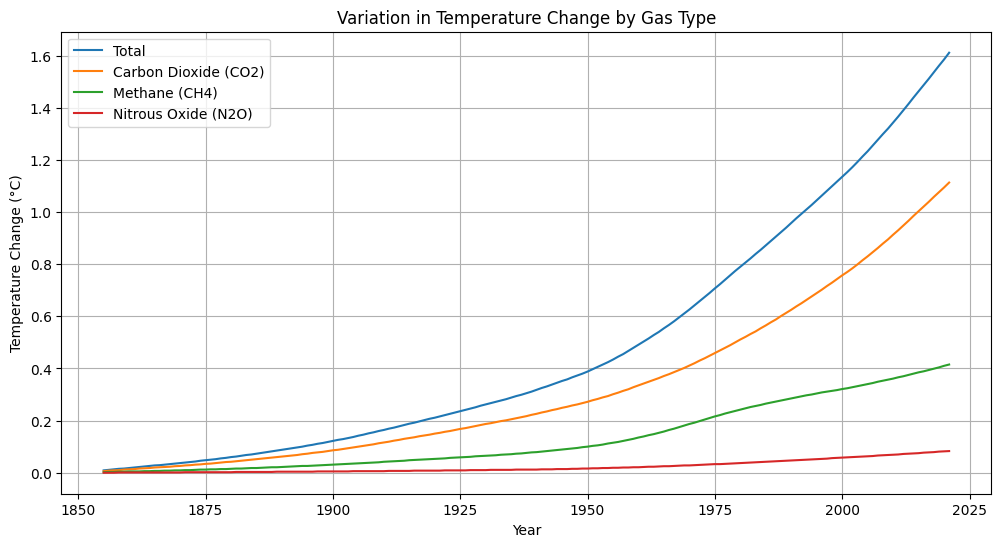

In [16]:
df_world = df[df['country'] == 'World'].copy()
years = df_world['year']
temp_ch4 = df_world['temperature_change_from_ch4']
temp_co2 = df_world['temperature_change_from_co2']
temp_ghg = df_world['temperature_change_from_ghg']
temp_n2o = df_world['temperature_change_from_n2o']

plt.figure(figsize=(12, 6))
plt.plot(years, temp_ghg, label="Total")
plt.plot(years, temp_co2, label="Carbon Dioxide (CO2)")
plt.plot(years, temp_ch4, label="Methane (CH4)")
plt.plot(years, temp_n2o, label="Nitrous Oxide (N2O)")

plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.title("Variation in Temperature Change by Gas Type")
plt.legend()
plt.grid(True)
plt.show()


<h3>CO<sub>2</sub> Emissions over the years</h3>


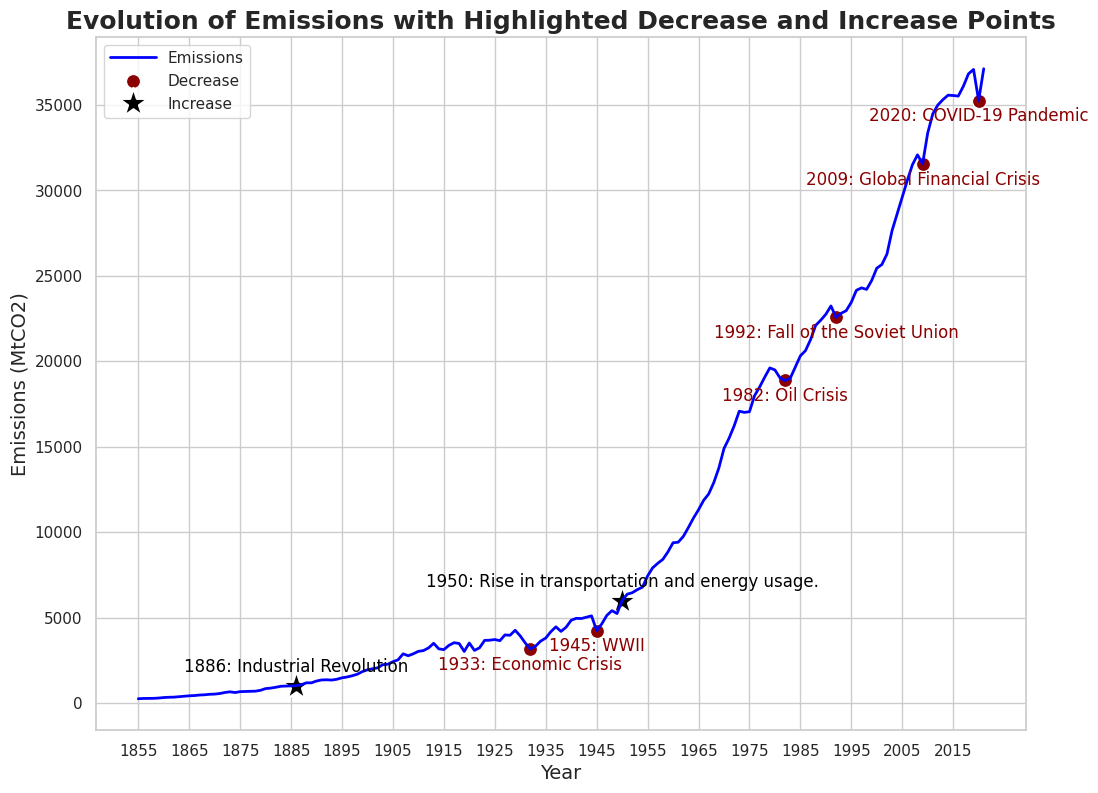

In [43]:
df_world = df[df['country'] == 'World'].copy()
df_world['decade'] = (df_world['year'] // 10) * 10
df_world['diff'] = df_world['co2'].diff(periods=2)  

asc_years = [1886, 1950]
asc_texts = [
    "1886: Industrial Revolution",
    "1950: Rise in transportation and energy usage."
]
desc_years = [1932, 1945, 1982, 1992, 2009, 2020]
desc_texts = [
    "1933: Economic Crisis",
    "1945: WWII",
    "1982: Oil Crisis",
    "1992: Fall of the Soviet Union",
    "2009: Global Financial Crisis",
    "2020: COVID-19 Pandemic"
]

plt.figure(figsize=(12, 9))
sns.lineplot(data=df_world, x='year', y='co2', color='blue', label='Emissions',linewidth=2)

sns.scatterplot(
    x=desc_years,
    y=df_world[df_world['year'].isin(desc_years)]['co2'],
    color='darkred',
    s=100,  
    label='Decrease'
)

sns.scatterplot(
    x=asc_years,
    y=df_world[df_world['year'].isin(asc_years)]['co2'],
    color='black',
    s=500,
    marker='*', 
    label='Increase'
)

for i, year in enumerate(desc_years):
    plt.annotate(
        desc_texts[i], 
        (year, df_world[df_world['year'] == year]['co2'].values[0]), 
        textcoords="offset points",
        xytext=(0, -15),
        ha='center',
        color='darkred'
    )

for i, year in enumerate(asc_years):
    plt.annotate(
        asc_texts[i], 
        (year, df_world[df_world['year'] == year]['co2'].values[0]), 
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        color='black'
    )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=[handles[0], handles[1], handles[2]], 
           labels=[labels[0], labels[1], labels[2]], 
           handlelength=3, 
           handleheight=1)

plt.title("Evolution of Emissions with Highlighted Decrease and Increase Points",fontsize=18, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Emissions (MtCO2)", fontsize=14)
plt.xticks(df_world['year'][::10])  
plt.grid(True)
plt.show()



## Main emission sources

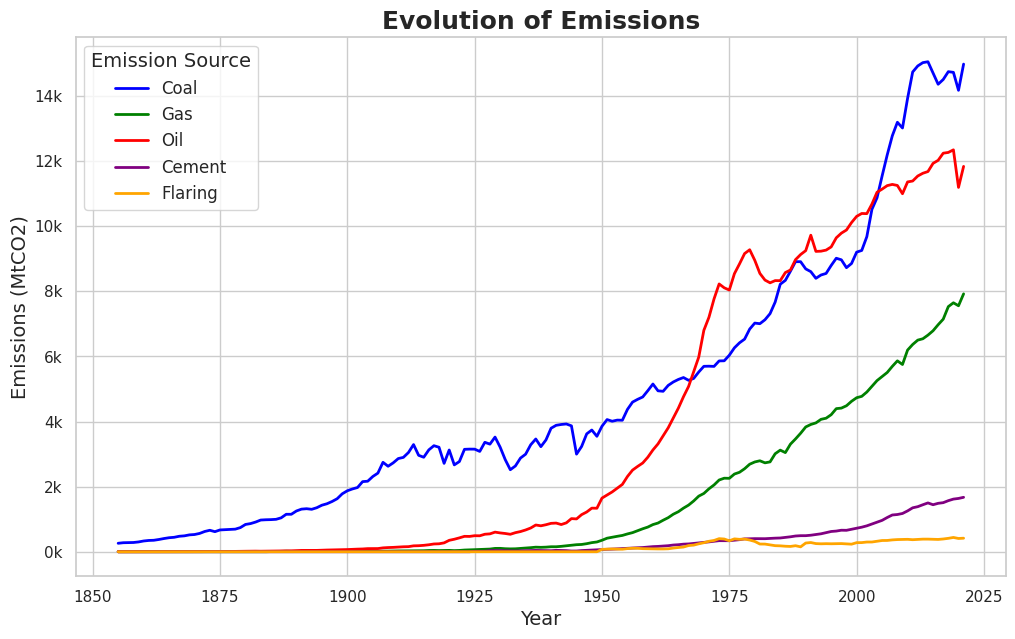

In [25]:
df_world = df[df['country'] == 'World'][["year", "coal_co2", "gas_co2", "oil_co2","cement_co2", "flaring_co2"]]

df_it2_grouped = df_world.groupby("year").sum().reset_index()


legend_names = {
    "coal_co2": "Coal",
    "gas_co2": "Gas",
    "oil_co2": "Oil",
    "cement_co2": "Cement",
    "flaring_co2": "Flaring",
}


sns.set(style="whitegrid")


plt.figure(figsize=(12, 7))


colors = ['blue', 'green', 'red', 'purple', 'orange']


for i, column in enumerate(df_it2_grouped.columns[1:]):
    label = legend_names.get(column, column)
    sns.lineplot(x=df_it2_grouped["year"], y=df_it2_grouped[column], label=label, color=colors[i % len(colors)], linewidth=2)


plt.title("Evolution of Emissions", fontsize=18, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Emissions (MtCO2)", fontsize=14)
plt.legend(title="Emission Source", title_fontsize=14, fontsize=12)


def thousands_formatter(x, pos):
    return f'{int(x / 1000)}k'

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))


plt.grid(True)

plt.show()

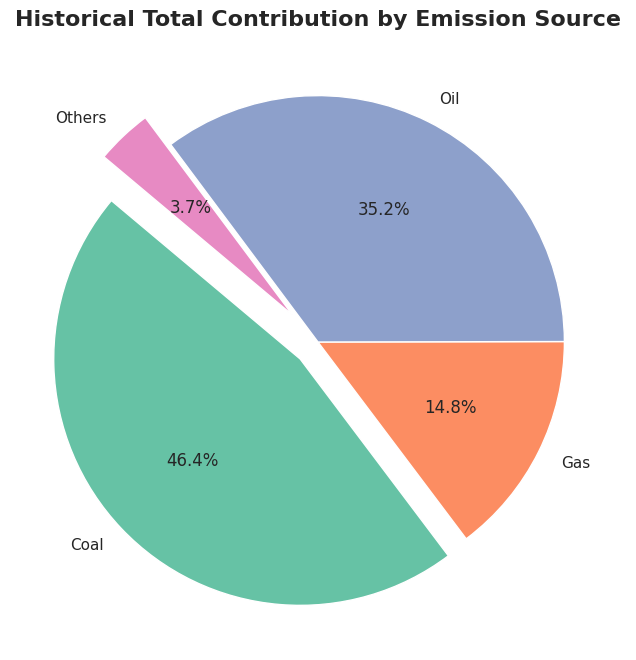

In [36]:
df_world_contribution = df[df['country'] == 'World'][["year", "coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]]
total_contributions = df_world_contribution[["coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]].sum()

contributions_pie = {
    "Coal": total_contributions["coal_co2"],
    "Gas": total_contributions["gas_co2"],
    "Oil": total_contributions["oil_co2"],
    "Others": total_contributions["flaring_co2"] + total_contributions["cement_co2"]
}

sns.set(style="whitegrid") 


plt.figure(figsize=(10, 8))


colors = sns.color_palette("Set2", len(contributions_pie))

explode = (0.1, 0, 0, 0.15)


plt.pie(contributions_pie.values(), labels=contributions_pie.keys(), autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)


plt.title("Historical Total Contribution by Emission Source", fontsize=16, weight='bold')


plt.show()

## Countries influence on emissions

<Figure size 1200x600 with 0 Axes>

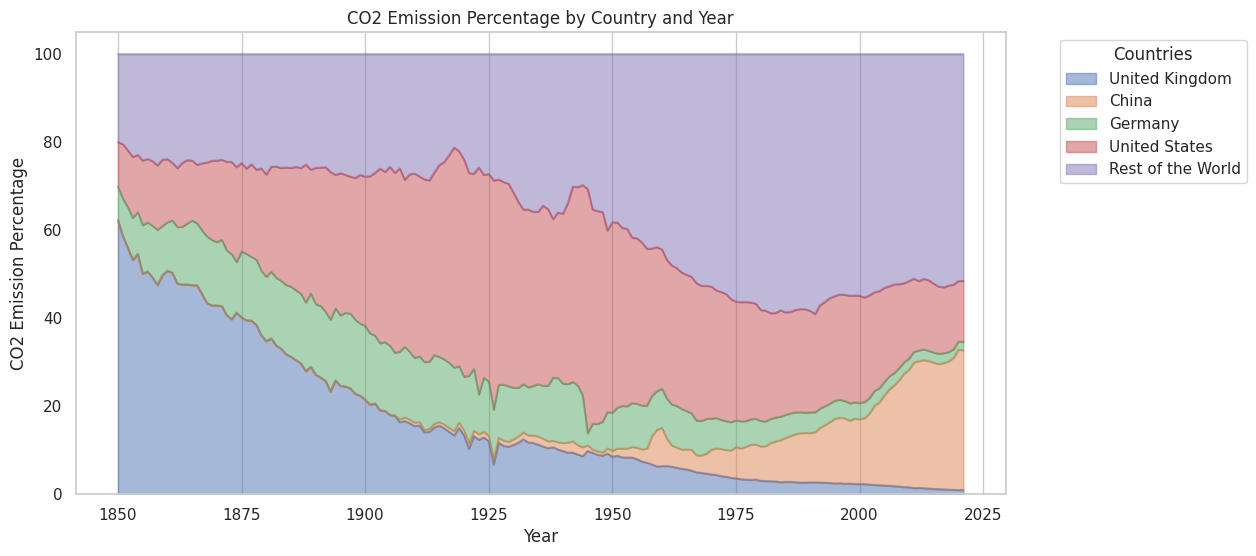

In [35]:
total_co2_per_year = df_filtered_country.groupby('year')['co2'].sum().reset_index()
total_co2_per_year.rename(columns={'co2': 'total_co2'}, inplace=True)

df_with_total = df_filtered_country.merge(total_co2_per_year, on='year')

df_with_total['co2_percentage'] = (df_with_total['co2'] / df_with_total['total_co2']) * 100

top_countries = df_with_total.groupby('country')['co2_percentage'].sum().nlargest(4).index.tolist()

if 'United Kingdom' not in top_countries:
    top_countries.append('United Kingdom')

df_with_total['country_group'] = df_with_total['country'].apply(lambda x: x if x in top_countries else 'Rest of the World')
grouped_data = df_with_total.groupby(['year', 'country_group'])['co2_percentage'].sum().reset_index()

pivot_data = grouped_data.pivot(index='year', columns='country_group', values='co2_percentage').fillna(0)

ordered_columns = ['United Kingdom'] + [col for col in pivot_data.columns if col not in ['United Kingdom', 'Rest of the World']] + ['Rest of the World']
pivot_data = pivot_data[ordered_columns]

plt.figure(figsize=(12, 6))
pivot_data.plot(kind='area', alpha=0.5, stacked=True, figsize=(12, 6))
plt.title('CO2 Emission Percentage by Country and Year')
plt.xlabel('Year')
plt.ylabel('CO2 Emission Percentage')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()



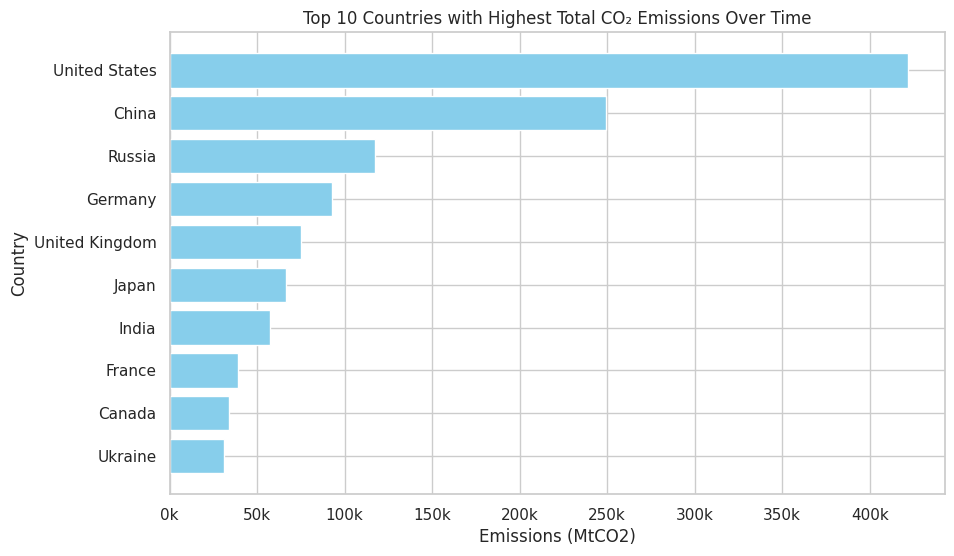

In [31]:
top10_countries_co2 = (df_filtered_country
                       .groupby('country', as_index=False)['co2']
                       .sum()
                       .sort_values(by='co2', ascending=False)
                       .head(10))

plt.figure(figsize=(10, 6))
plt.barh(top10_countries_co2['country'], top10_countries_co2['co2'], color='skyblue')
plt.xlabel('Emissions (MtCO2)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Total CO₂ Emissions Over Time')

def thousands_formatter(x, pos):
    return f'{int(x / 1000)}k'

plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.gca().invert_yaxis()  


## Main emissions sources

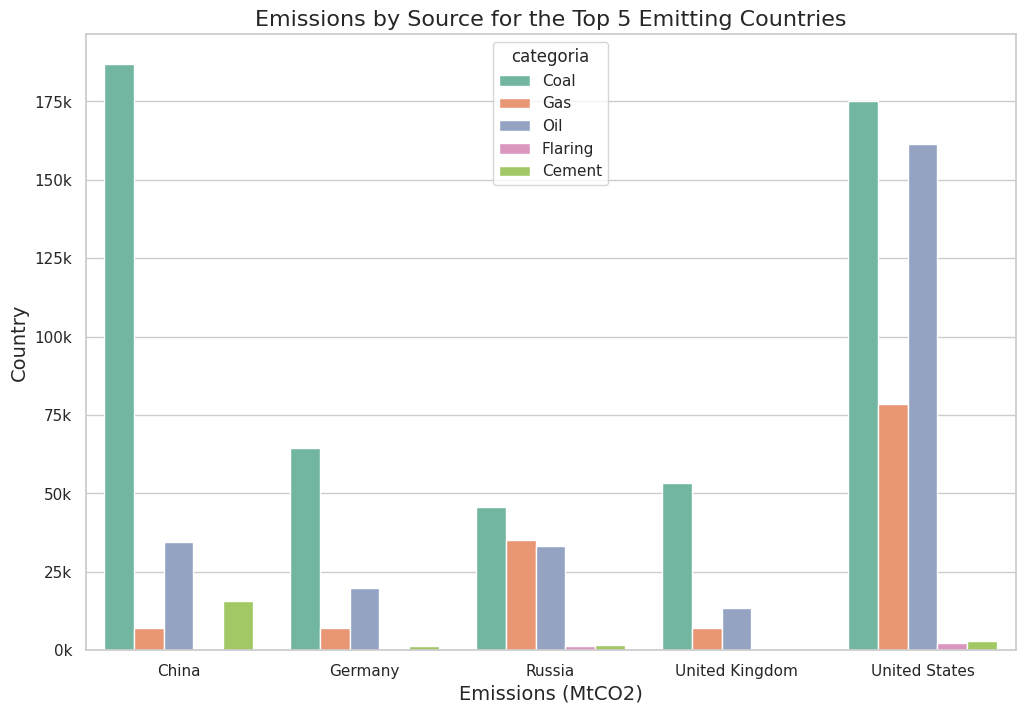

In [41]:
df_total_emissions = df_filtered_country.groupby('country')[['coal_co2', 'gas_co2', 'oil_co2', 'flaring_co2', 'cement_co2']].sum()
df_total_emissions['total_emission'] = df_total_emissions.sum(axis=1)
top_5_countries = df_total_emissions.nlargest(5, 'total_emission').index
df_top_5 = df_filtered_country[df_filtered_country['country'].isin(top_5_countries)]
df_top_5_emissions = df_top_5.groupby('country')[['coal_co2', 'gas_co2', 'oil_co2', 'flaring_co2', 'cement_co2']].sum()
df_top_5_emissions = df_top_5_emissions.reset_index()

df_melted = df_top_5_emissions.melt(id_vars=["country"], value_vars=["coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"],
                                    var_name="categoria", value_name="emission")

category_names = {
    "coal_co2": "Coal",
    "gas_co2": "Gas",
    "oil_co2": "Oil",
    "flaring_co2": "Flaring",
    "cement_co2": "Cement"
}

df_melted['categoria'] = df_melted['categoria'].map(category_names)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(x="country", y="emission", hue="categoria", data=df_melted, palette="Set2", dodge=True)

plt.title("Emissions by Source for the Top 5 Emitting Countries", fontsize=16)
plt.xlabel("Emissions (MtCO2)", fontsize=14)
plt.ylabel("Country", fontsize=14)

def thousands_formatter(x, pos):
    return f'{int(x / 1000)}k'

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))



plt.show()
